In [1]:
import numpy as np
from pycbc import frame
from pycbc.waveform import get_td_waveform
import pickle
from functools import partial
import p_tqdm
from calcwf import *

# Save strain and psd

In [2]:
outdir = '/home/ben.patterson/projects/simple-pe/simple-pe_tests/h0_peak_params/imrphenomxphm_24/'

In [4]:
# Generate waveform and psd
_, h0, _, _, _, _, _, _, _ = get_h([1,1,1,1], 10, 0.1, chirp2total(24, 2), 2, 4096)
print(h0.start_time)
h0.start_time = 1126259462
h0.prepend_zeros(64*4096)
h0.append_zeros(64*4096)
psd, _ = gen_psd(h0, 10)

# Save waveform and psd
h0.save(outdir+'strain.txt')
frame.write_frame(outdir+'strain.gwf', "L1:h0_only", h0.real())
psd.save(outdir+'psd.txt')

-6.500488281


# Test results

In [8]:
def match_with_h0(chirp, q, chi_align, f_low, h0, approximant):

    # Generate waveform
    total = chirp2total(chirp, q)
    mass2 = total/(1+q)
    mass1 = total - mass2
    hp, hc = get_td_waveform(approximant=approximant,
                             mass1=mass1,
                             mass2=mass2,
                             spin1z=chi_align/2,
                             spin2z=chi_align/2,
                             delta_t=1.0/4096,
                             f_lower=f_low,
                             mode_array=[[2,2],[2,-2]])

    # Conduct match
    m = match_wfs(h0.real(), hp, f_low, True)

    return m

In [5]:
# Simple-pe result
match_with_h0(23.9428, 1.9034, -0.0313, 10, h0, 'IMRPhenomXPHM')

here
end


0.9849280066614614

In [6]:
# Simple-pe result but chirp mass from our degen line
degen_chirp = favata_et_al_avg(0.1, 24, 0, 4096, f_low=10, q=1.9034)
print(degen_chirp)
match_with_h0(degen_chirp, 1.9034, -0.0313, 10, h0, 'IMRPhenomXPHM')

/home/ben.patterson/.conda/envs/teobresums_eccentric/lib/python3.10/site-packages/pycbc/types/array.py:435: RuntimeWarning: divide by zero encountered in power
  return self._data ** other
/home/ben.patterson/.conda/envs/teobresums_eccentric/lib/python3.10/site-packages/pycbc/types/array.py:348: RuntimeWarning: invalid value encountered in multiply
  return self._data * other


24.094604478054826
here
end


0.9989152911311617

# IMRPhenomXPHM, f_low=10Hz

In [54]:
# Grid match coordinates
chirp_vals = np.linspace(23.85, 24.15, 31)
q_vals = np.linspace(1.8, 2.1, 31)
chi_align_vals = np.linspace(-0.05, 0.02, 31)
chirp_long, q_long, chi_align_long = np.meshgrid(chirp_vals, q_vals, chi_align_vals)

# Load gridded matches
with open(outdir+'imrphenomxphm_f_low_10/matches', 'rb') as fp:
    data = pickle.load(fp)
data = np.reshape(data, [len(q_vals), len(chirp_vals), len(chi_align_vals)])

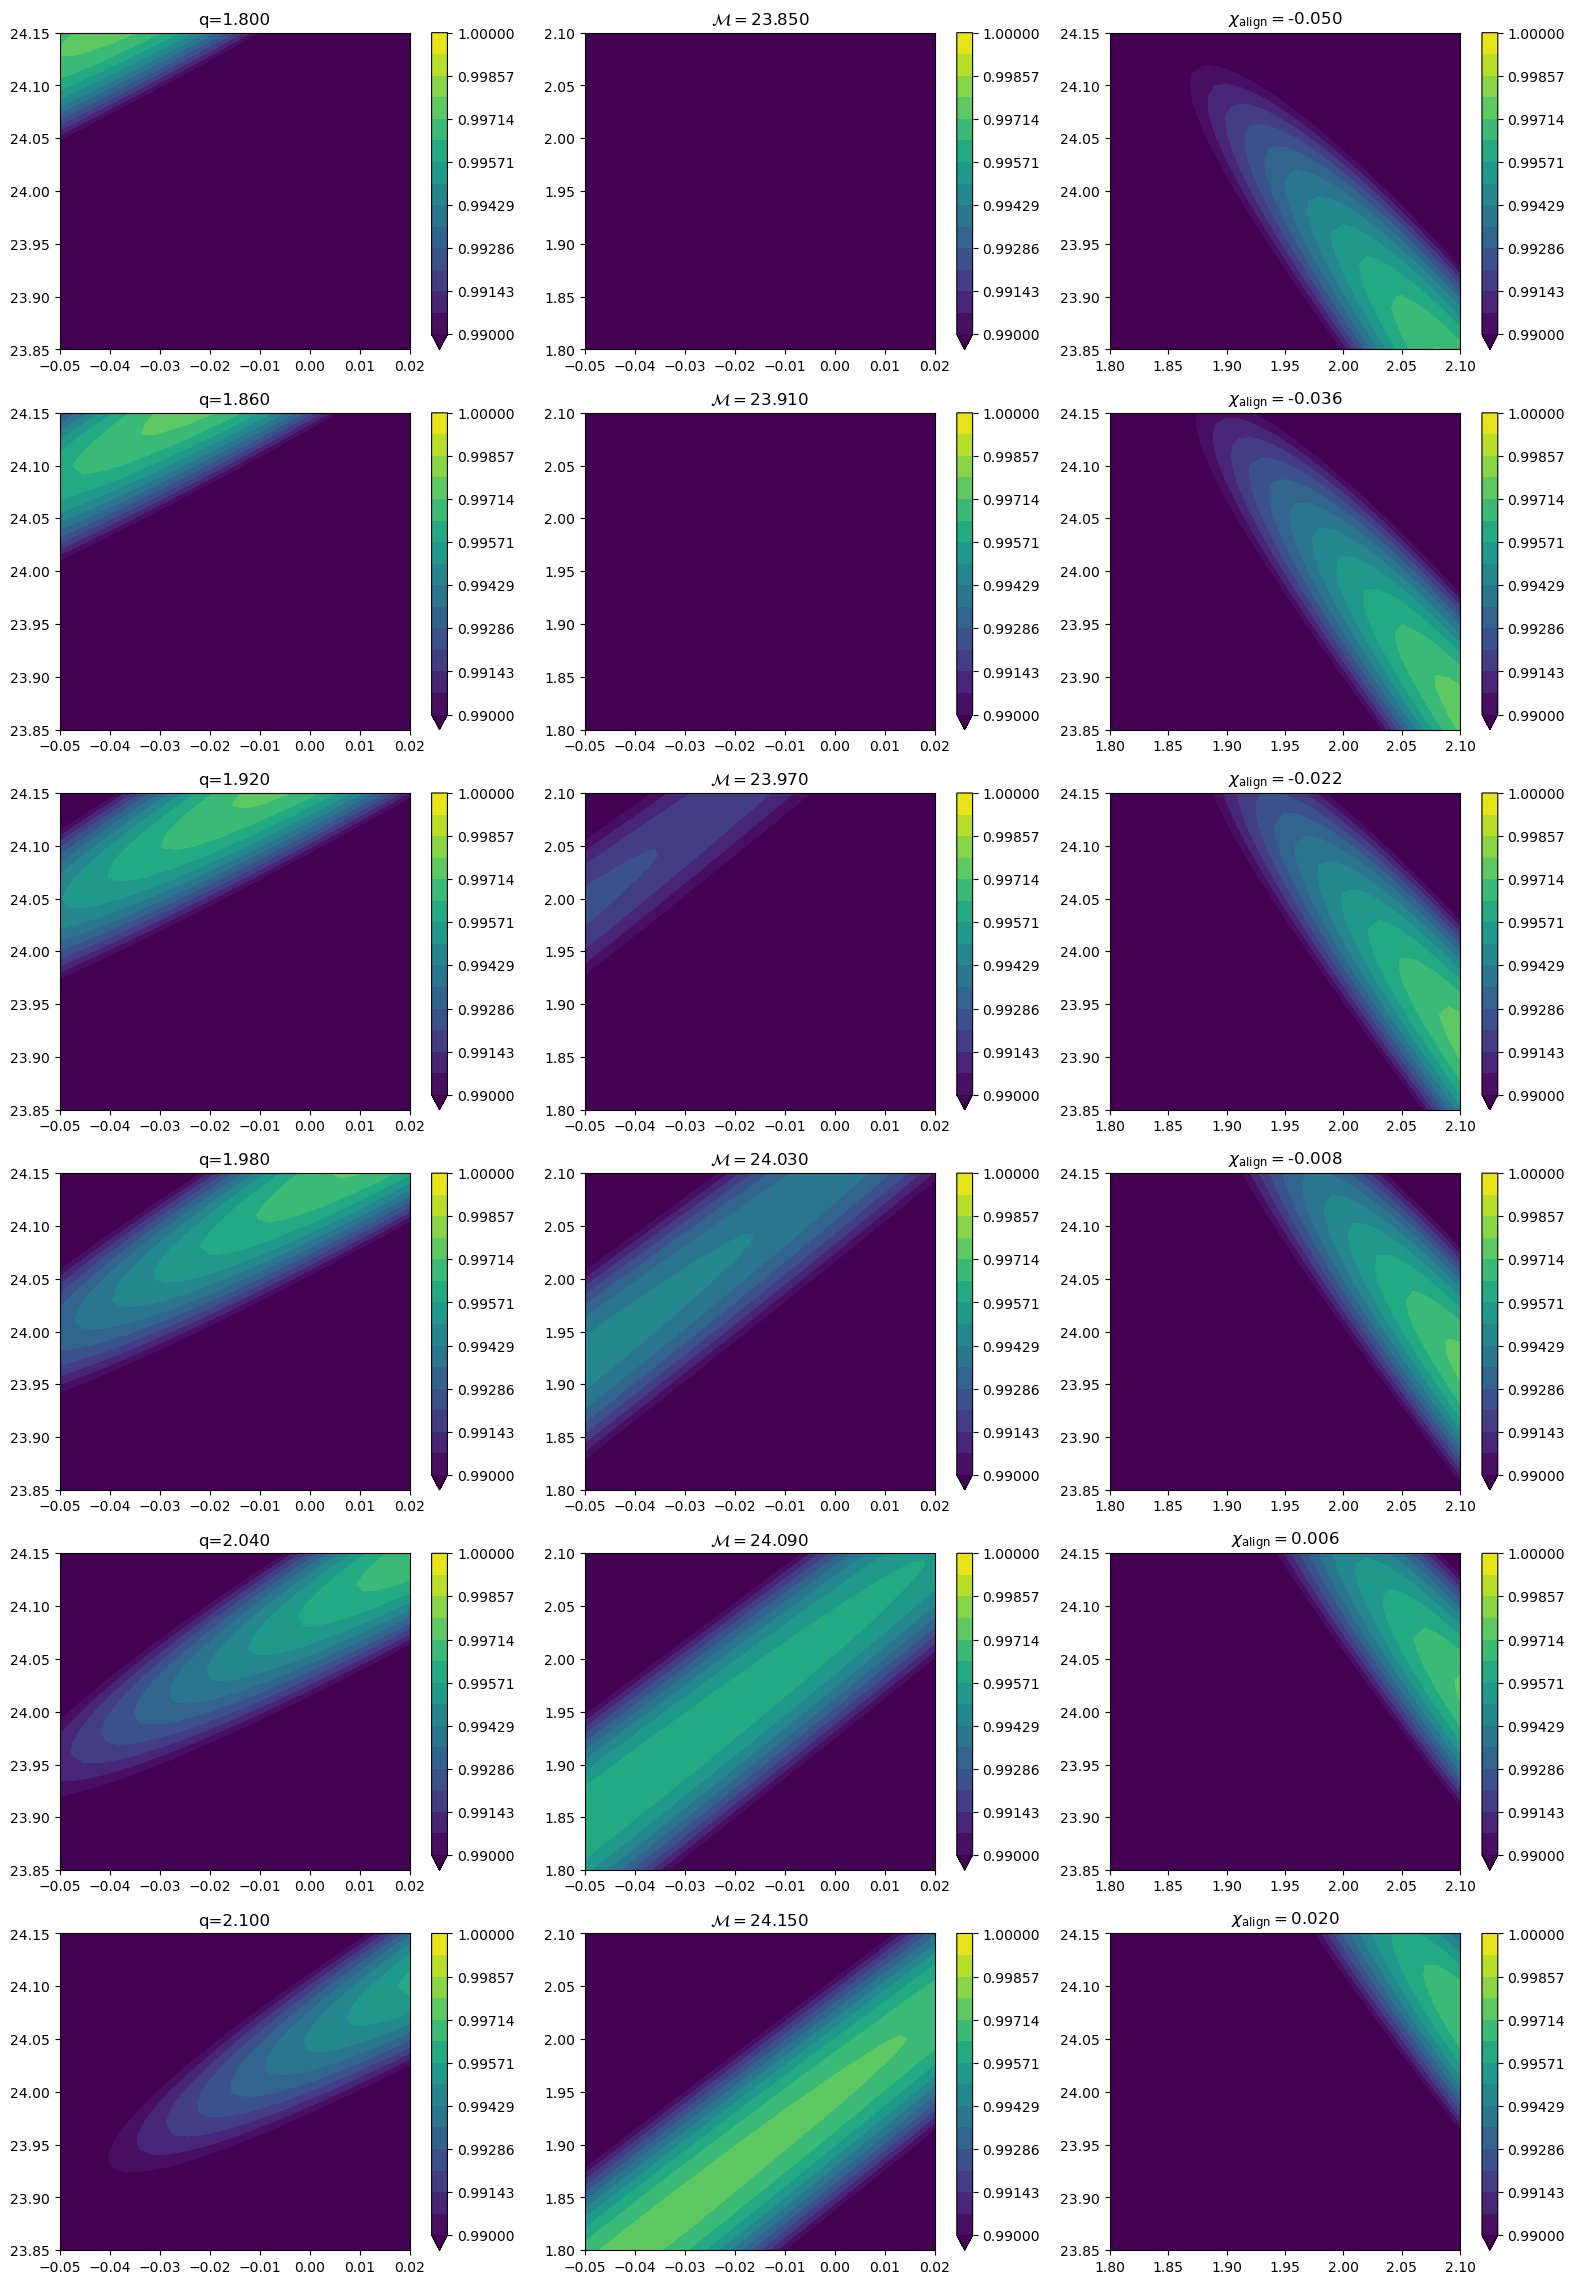

In [56]:
plt.figure(figsize=(6.4*3,4.8*6))

# Loop over each 3rd dimension step
for i in range(6):

    # Chirp against chi align
    plt.subplot(6, 3, 1+i*3)
    plt.contourf(chi_align_vals, chirp_vals, data[i*6, :, :], np.linspace(0.99, 1, 15), vmin=0.99, vmax=1, extend='min')
    plt.title('q='+f'{q_vals[i*6]:.3f}')
    plt.colorbar()

    # Mass ratio against chi align
    plt.subplot(6, 3, 2+i*3)
    plt.contourf(chi_align_vals, q_vals, data[:, i*6, :], np.linspace(0.99, 1, 15), vmin=0.99, vmax=1, extend='min')
    plt.title('$\mathcal{M}=$'+f'{chirp_vals[i*6]:.3f}')
    plt.colorbar()

    # Mass ratio against chirp mass
    plt.subplot(6, 3, 3+i*3)
    plt.contourf(q_vals, chirp_vals, data[:, :, i*6], np.linspace(0.99, 1, 15), vmin=0.99, vmax=1, extend='min')
    plt.title('$\chi_\mathrm{align}=$'+f'{chi_align_vals[i*6]:.3f}')
    plt.colorbar()

# IMRPhenomXPHM, f_low=20Hz

In [57]:
# Grid match coordinates
chirp_vals = np.linspace(23.85, 24.15, 31)
q_vals = np.linspace(1.8, 2.1, 31)
chi_align_vals = np.linspace(-0.05, 0.02, 31)
chirp_long, q_long, chi_align_long = np.meshgrid(chirp_vals, q_vals, chi_align_vals)

# Load gridded matches
with open(outdir+'imrphenomxphm_f_low_20/matches', 'rb') as fp:
    data = pickle.load(fp)
data = np.reshape(data, [len(q_vals), len(chirp_vals), len(chi_align_vals)])

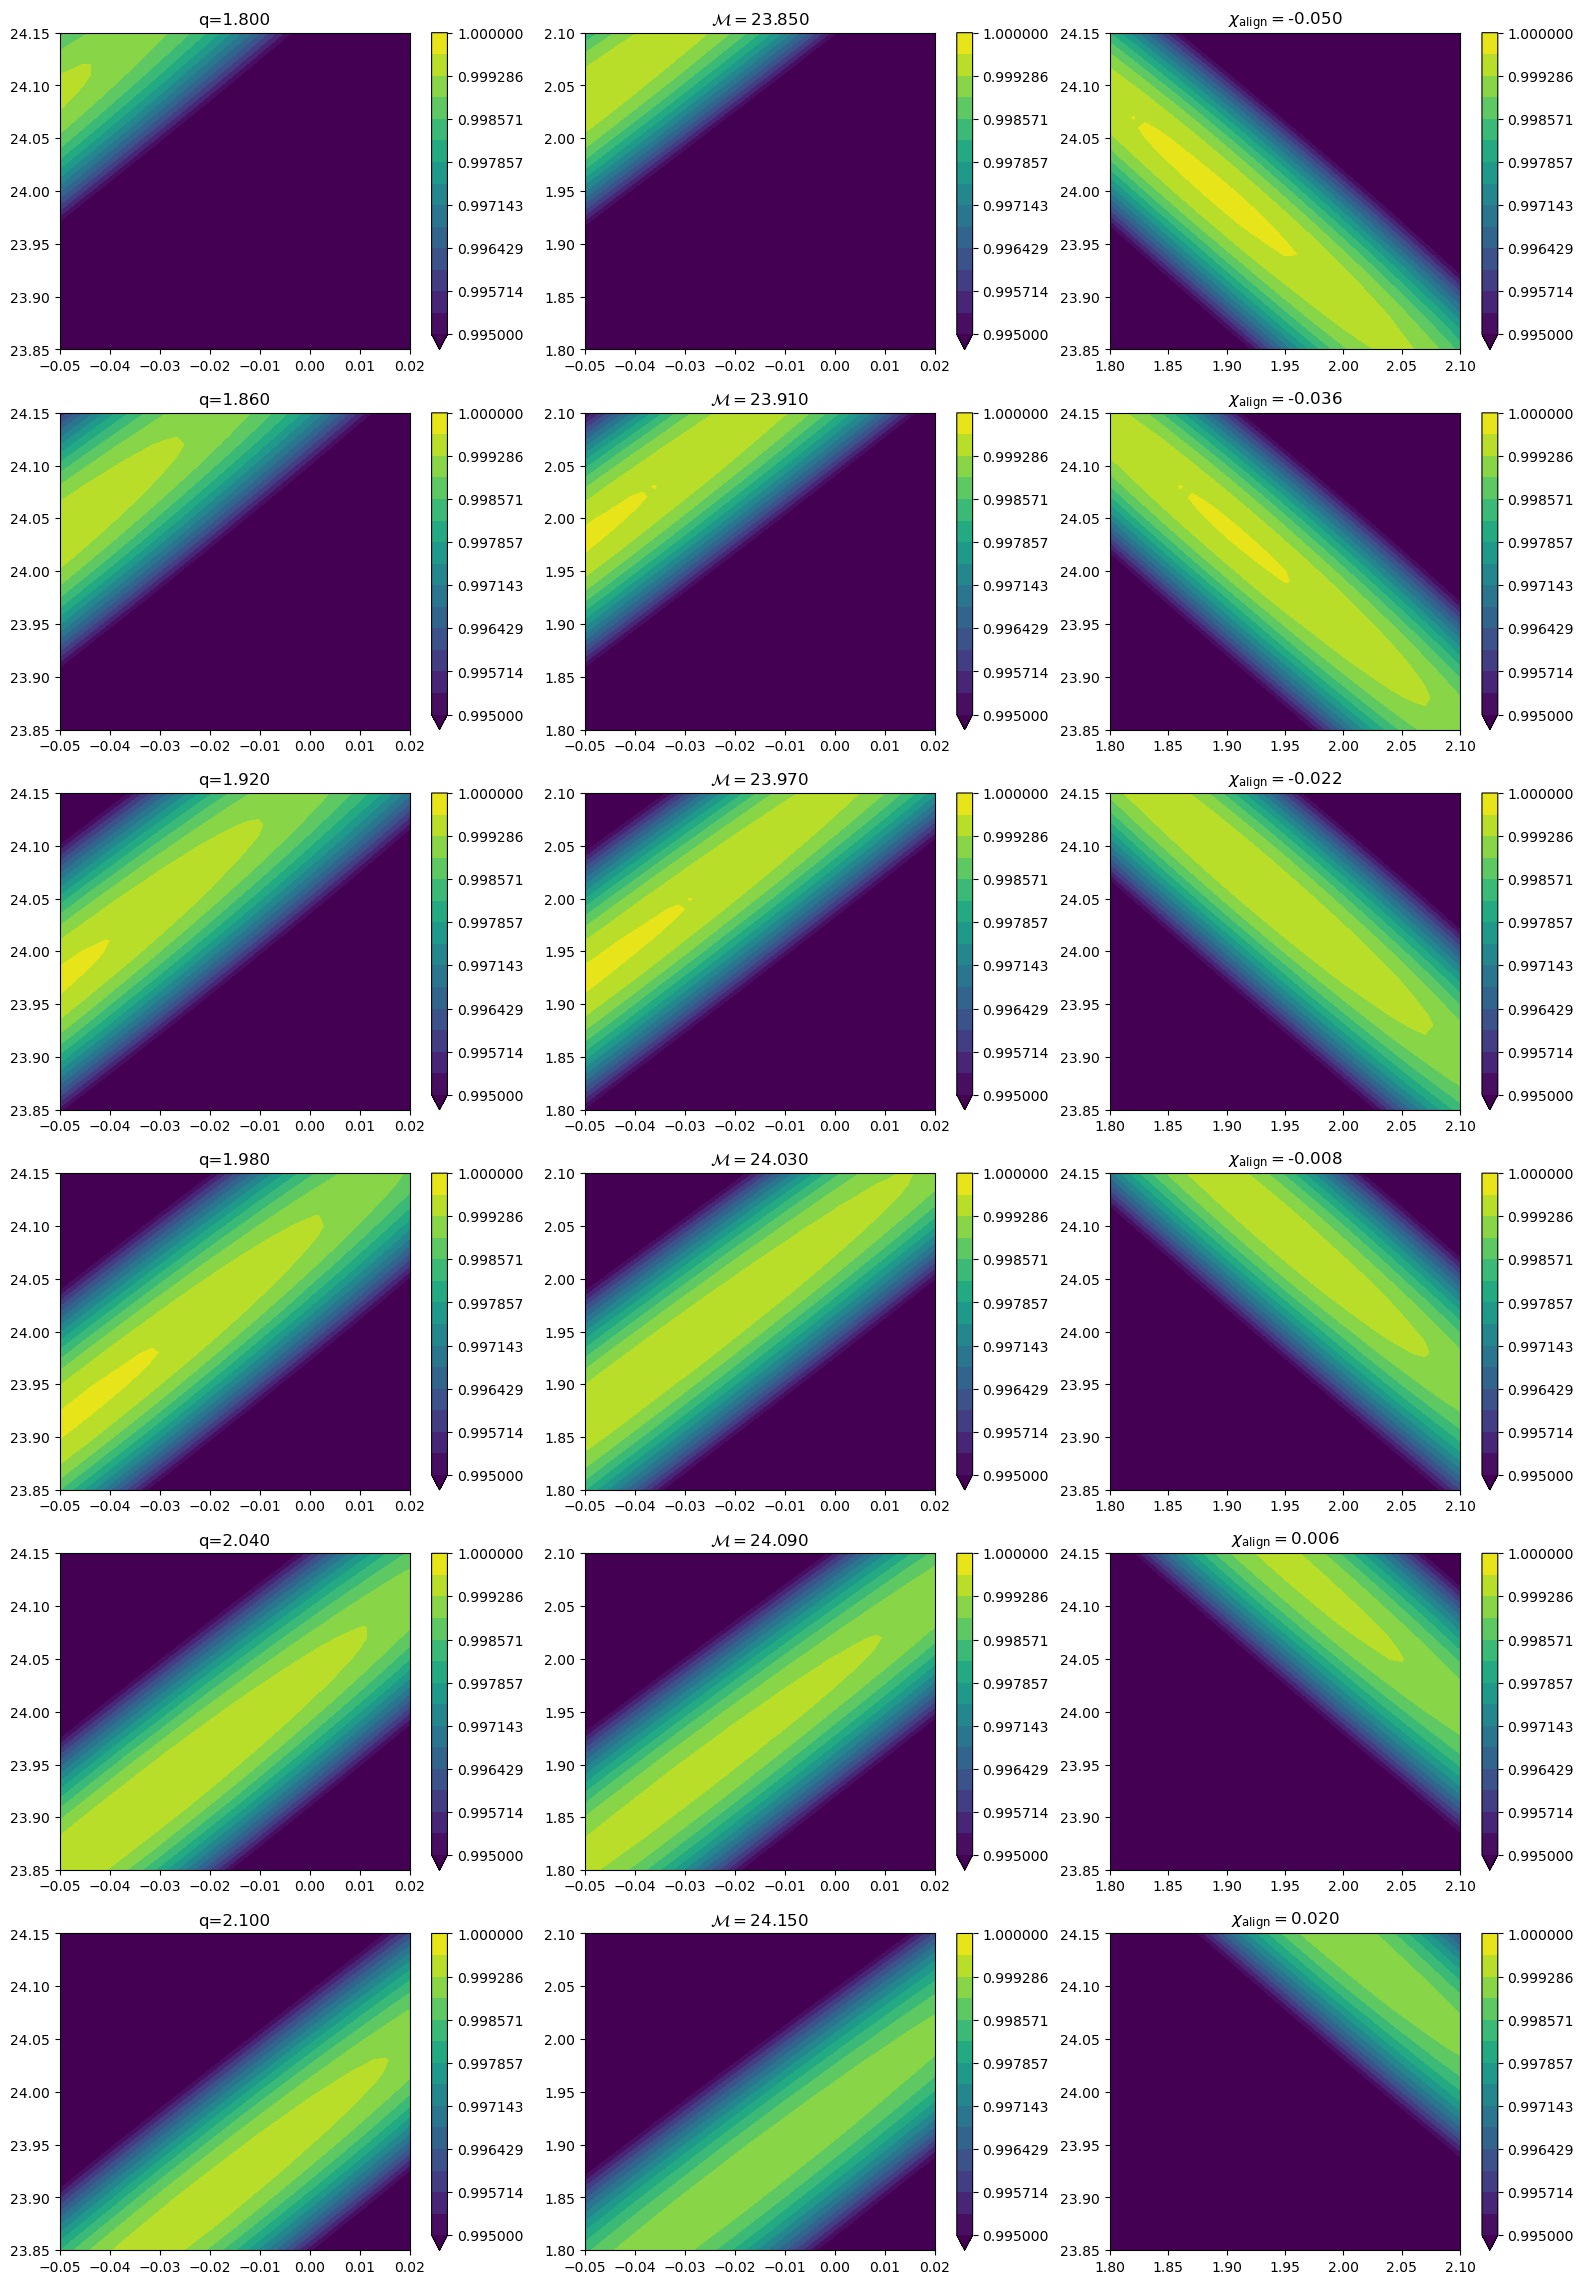

In [59]:
plt.figure(figsize=(6.4*3,4.8*6))

# Loop over each 3rd dimension step
for i in range(6):

    # Chirp against chi align
    plt.subplot(6, 3, 1+i*3)
    plt.contourf(chi_align_vals, chirp_vals, data[i*6, :, :], np.linspace(0.995, 1, 15), vmin=0.995, vmax=1, extend='min')
    plt.title('q='+f'{q_vals[i*6]:.3f}')
    plt.colorbar()

    # Mass ratio against chi align
    plt.subplot(6, 3, 2+i*3)
    plt.contourf(chi_align_vals, q_vals, data[:, i*6, :], np.linspace(0.995, 1, 15), vmin=0.995, vmax=1, extend='min')
    plt.title('$\mathcal{M}=$'+f'{chirp_vals[i*6]:.3f}')
    plt.colorbar()

    # Mass ratio against chirp mass
    plt.subplot(6, 3, 3+i*3)
    plt.contourf(q_vals, chirp_vals, data[:, :, i*6], np.linspace(0.995, 1, 15), vmin=0.995, vmax=1, extend='min')
    plt.title('$\chi_\mathrm{align}=$'+f'{chi_align_vals[i*6]:.3f}')
    plt.colorbar()

# find_best_match(), simple-pe env

In [1]:
import numpy as np
from pycbc import frame
from pycbc.types import timeseries, frequencyseries
from simple_pe.param_est import matches

/home/ben.patterson/.conda/envs/igwn_simple_pe_dev/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Load h0
outdir = '/home/ben.patterson/projects/simple-pe/simple-pe_tests/h0_peak_params/chirp_24/'
h0 = timeseries.load_timeseries(outdir+'strain.txt')
psd = frequencyseries.load_frequencyseries(outdir+'psd.txt')

In [3]:
import logging
_logger = logging.getLogger('PESummary')
_logger.setLevel(logging.CRITICAL + 10)

In [6]:
# Find best match with simple-pe function
x = {"chirp_mass": 24, "symmetric_mass_ratio": 0.2222, "chi_align": 0, "distance": 1}
x_prime, m_0 = matches.find_best_match(h0, x, ["chirp_mass", "symmetric_mass_ratio", "chi_align"], 10, psd, 'IMRPhenomXPHM')

Calculating the metric | iteration 4 < 20 | error 0.00011 > 0.0003: 


TypeError: 'float' object is not iterable